# LOAN ELIGIBILITY PREDICTION

Let's Say, You are the owner of the Housing Finance Company and you want to build your own model to predict the customers are applying for the home loan and company want to check and validate the customer are eligible for the home loan.

The Problem is, In a Simple Term, Company wants to make automate the Loan Eligibility Process in a real time scenario related to customer's detail provided while applying application for home loan forms. You will use the training set to build your model, and the test set to validate it. Both the files are stored on the web as CSV files; their URLs are already available as character strings in the sample code.

# Dataset Key Information

Loan_ID--------------> Unique Loan ID

Gender --------------> Male/ Female

Married --------------> Applicant married (Y/N)

Dependents ------------> Number of dependents

Education -------------> Applicant Education (Graduate/ Under Graduate)

Self_Employed ---------> Self-employed (Y/N)

ApplicantIncome -------> Applicant income

CoapplicantIncome -----> Coapplicant income

LoanAmount -----------> Loan amount in thousands

Loan_Amount_Term ------> Term of a loan in months

Credit_History --------> Credit history meets guidelines

Property_Area ---------> Urban/ Semi-Urban/ Rural

Loan_Status -----------> Loan approved (Y/N)

# Importing Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Train Data

In [2]:
train_data = pd.read_csv(r'D:\Rohit\Data Science Class\Pravin Palve\loan-train.csv')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    int64  
 9   Loan_Amount_Term   614 non-null    int64  
 10  Credit_History     614 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 62.5+ KB


Rows and Columns in our Dataset

In [4]:
train_data.shape

(614, 13)

First 5 Rows in Dataset

In [5]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,Yes,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,Yes,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,Yes,Urban,Y


Datatypes in Dataset

In [6]:
train_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents             int64
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount             int64
Loan_Amount_Term       int64
Credit_History        object
Property_Area         object
Loan_Status           object
dtype: object

# Test Data

In [7]:
test_data = pd.read_csv(r'D:\Rohit\Data Science Class\Pravin Palve\loan-test.csv')

In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


Rows and Columns in our Dataset

In [9]:
test_data.shape

(367, 12)

First 5 Rows in Dataset

In [10]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


Datatypes in Dataset

In [11]:
test_data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

Checking missing values or nan values in our Test dataset

In [12]:
test_data.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Checking missing values or nan values in our Train dataset

In [13]:
train_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Replaceing Nan Values in Train Dataset

In [14]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)

In [15]:
train_data['Married'].fillna(train_data['Married'].mode()[0], inplace = True)

In [16]:
train_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)

In [17]:
train_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)

In [18]:
train_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace = True)

In [19]:
train_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace = True)

In [20]:
train_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace = True)

# Replaceing Nan Values in Test Dataset

In [21]:
test_data['Gender'].fillna(train_data['Gender'].mode()[0], inplace = True)

In [22]:
test_data['Dependents'].fillna(train_data['Dependents'].mode()[0], inplace = True)

In [23]:
test_data['Self_Employed'].fillna(train_data['Self_Employed'].mode()[0], inplace = True)

In [24]:
test_data['LoanAmount'].fillna(train_data['LoanAmount'].mean(), inplace = True)

In [25]:
test_data['Loan_Amount_Term'].fillna(train_data['Loan_Amount_Term'].mode()[0], inplace = True)

In [26]:
test_data['Credit_History'].fillna(train_data['Credit_History'].mode()[0], inplace = True)

# Exploratory Data Analysis

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:>

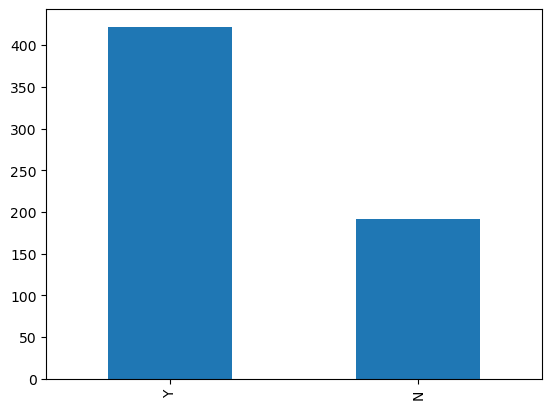

In [28]:
train_data['Loan_Status'].value_counts().plot.bar()

The loan of 422(around 69%) people out of 614 were approved.

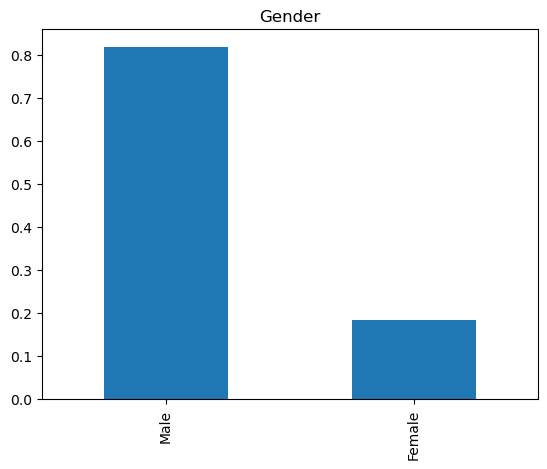

In [29]:
train_data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')
plt.show()

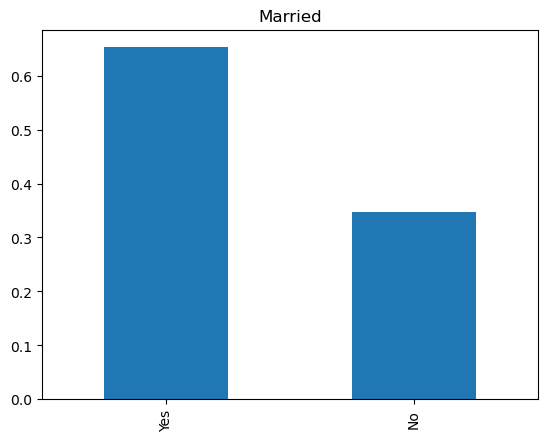

In [30]:
train_data['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.show()

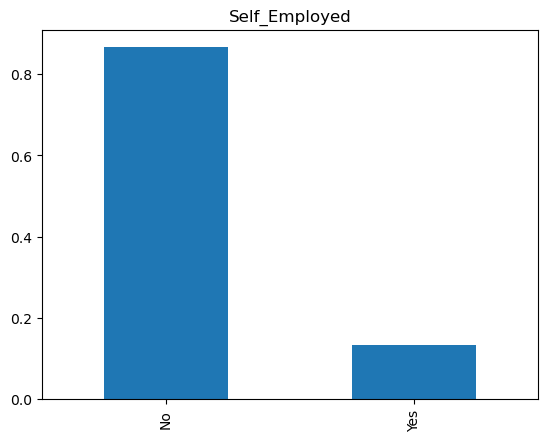

In [31]:
train_data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.show()

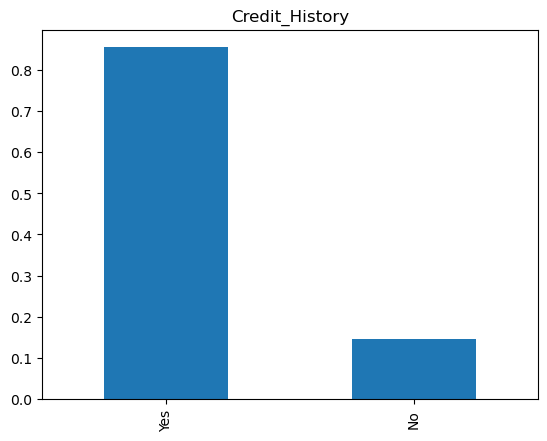

In [32]:
train_data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

It can be inferred from the above bar plots that:

    1. 80% of applicants in the dataset are male.

    2. Around 65% of the applicants in the dataset are married.

    3. Around 15% of applicants in the dataset are self-employed.

    4. Around 85% of applicants have repaid their doubts.

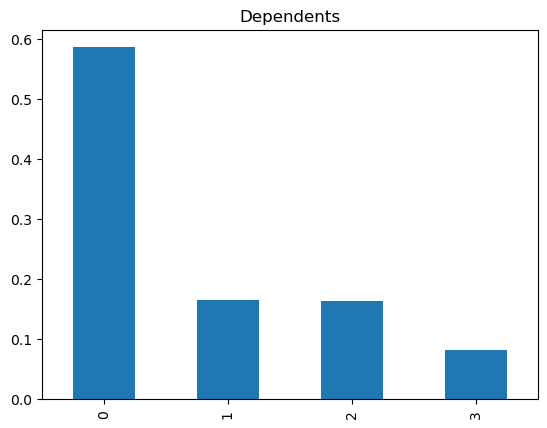

In [33]:
train_data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')
plt.show()

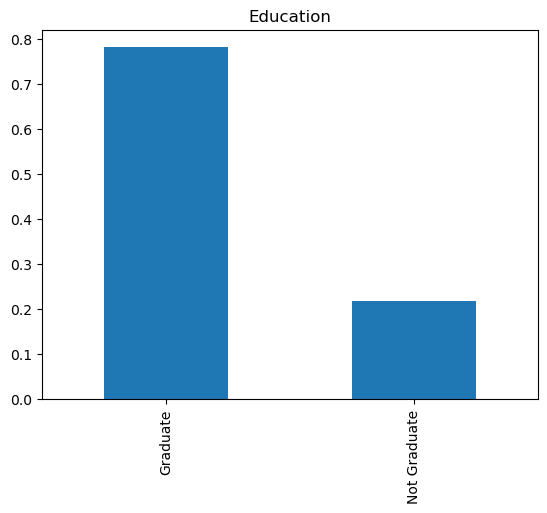

In [34]:
train_data['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.show()

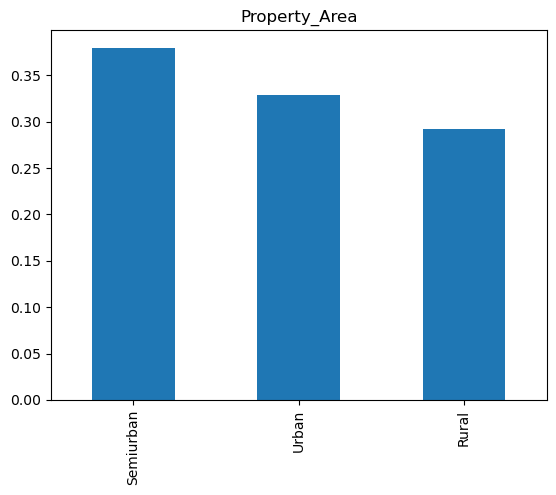

In [35]:
train_data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

The following inferences can be made from the above bar plots:

    1. Most of the applicants don't have any dependents.

    2. Around 80% of the applicants are Graduate.

    3. Most of the applicants are from the Semiurban area.

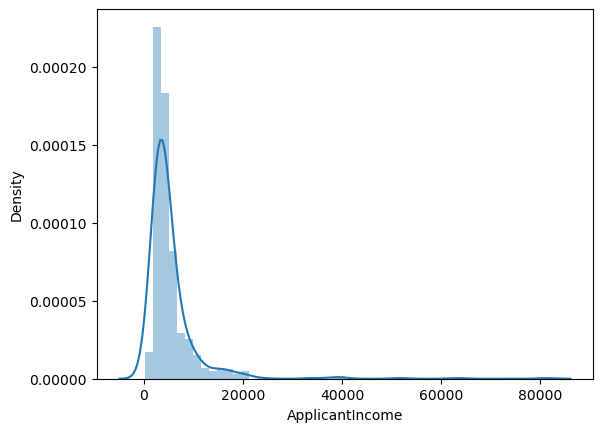

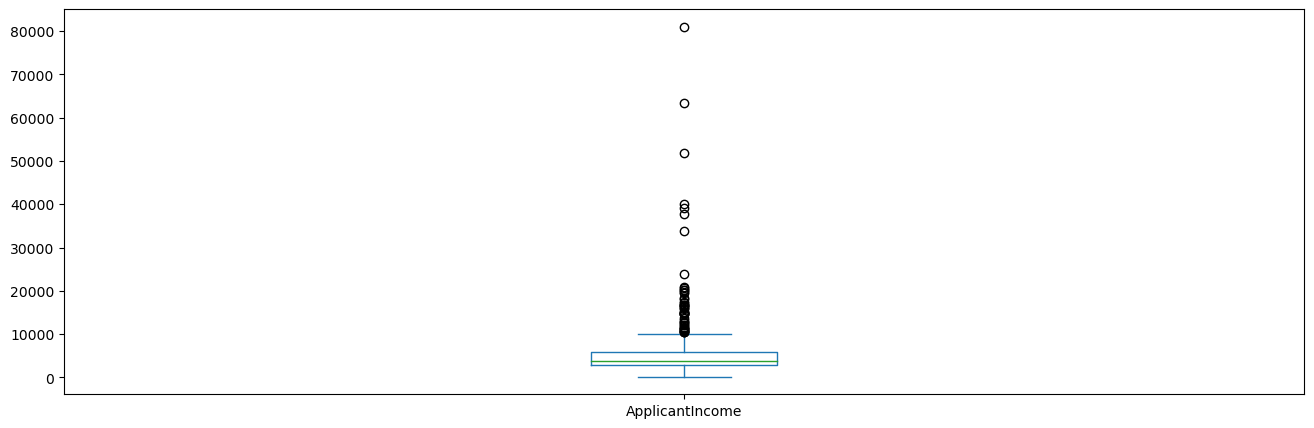

In [36]:
sns.distplot(train_data['ApplicantIncome'])
plt.show()
train_data['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income are towards the left which means it is not normally distributed.

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

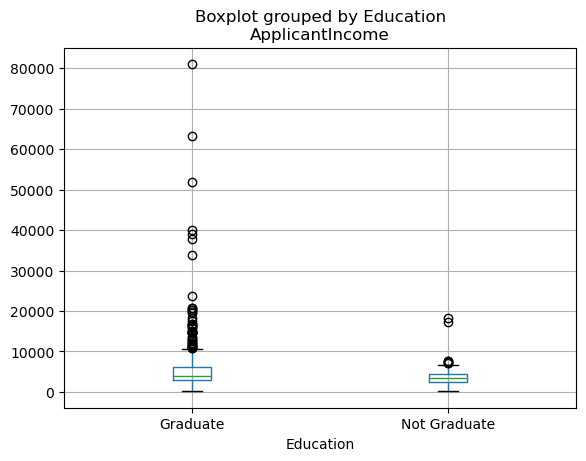

In [37]:
train_data.boxplot(column = 'ApplicantIncome', by = 'Education')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be outliers.

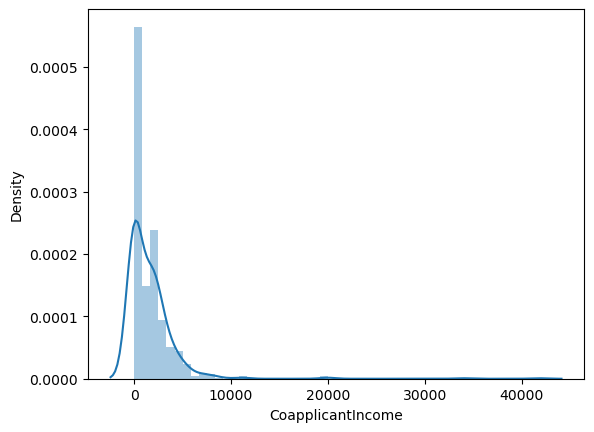

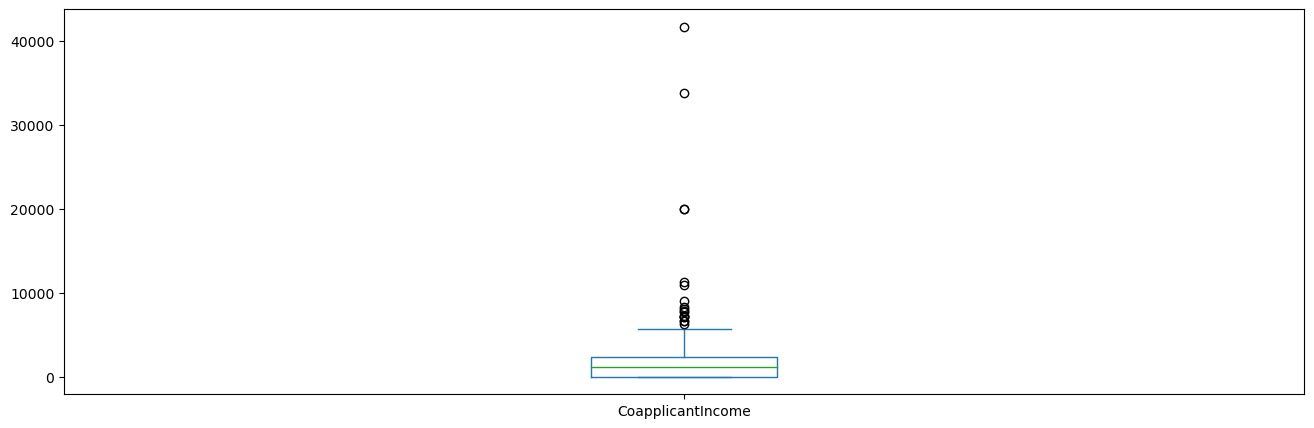

In [38]:
sns.distplot(train_data['CoapplicantIncome'])
plt.show()
train_data['CoapplicantIncome'].plot.box(figsize = (16,5))
plt.show()

We see a similar distribution as that of the applicant's income. The majority of co-applicants income ranges from 0 to 5000. We also see a lot of outliers in the applicant's income and it is not normally distributed.

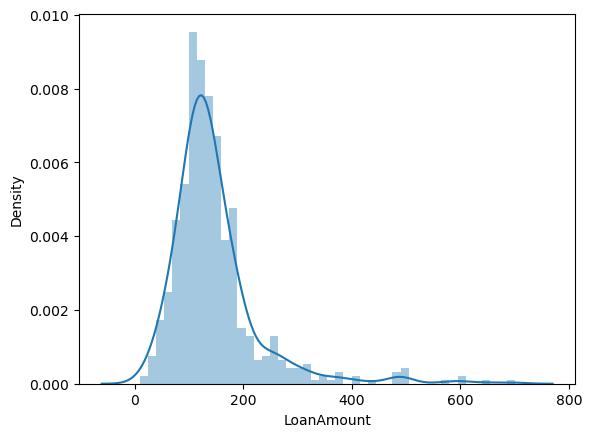

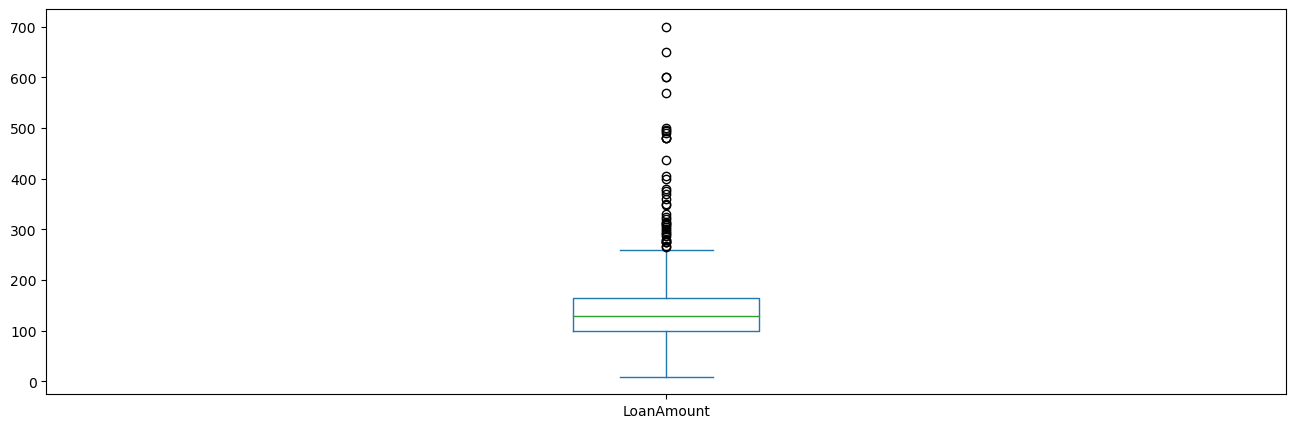

In [39]:
sns.distplot(train_data['LoanAmount'])
plt.show()
train_data['LoanAmount'].plot.box(figsize = (16,5))
plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.

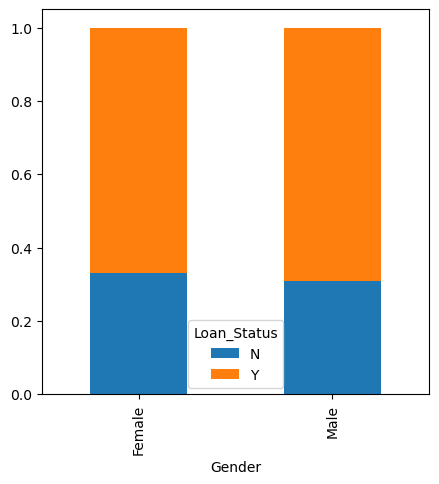

In [40]:
Gender = pd.crosstab(train_data['Gender'], train_data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

It can be inferred that the proportion of male and female applicants is more or less the same for both approved and unapproved loans.

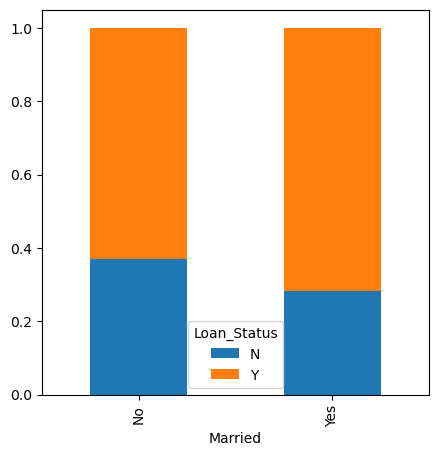

In [41]:
Married = pd.crosstab(train_data['Married'], train_data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

The proportion of married applicants is higher for approved loans.

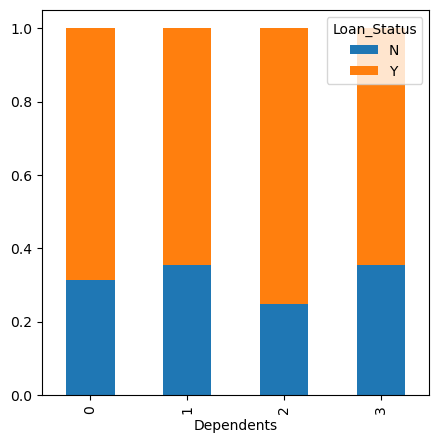

In [42]:
Dependents = pd.crosstab(train_data['Dependents'], train_data['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

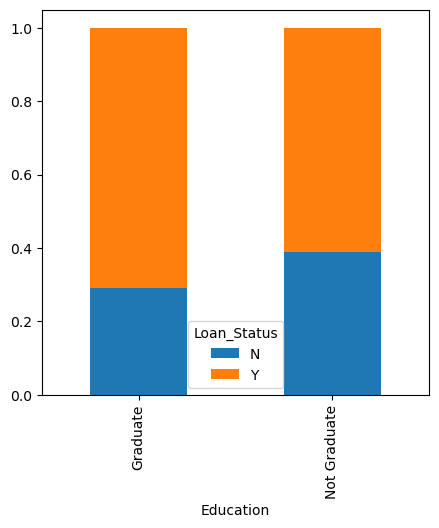

In [43]:
Education = pd.crosstab(train_data['Education'], train_data['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

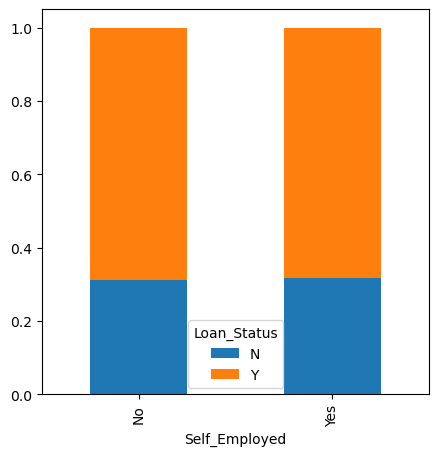

In [44]:
Self_Employed = pd.crosstab(train_data['Self_Employed'], train_data['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

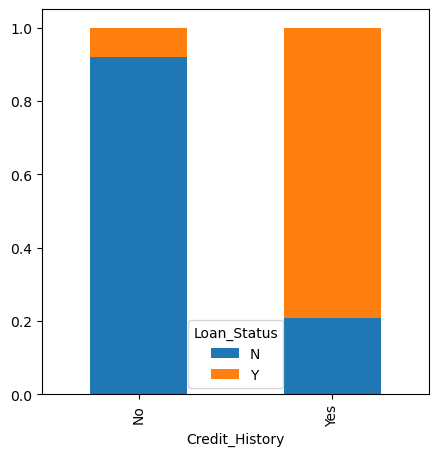

In [45]:
Credit_History = pd.crosstab(train_data['Credit_History'], train_data['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

It seems people with a credit history as 1 are more likely to get their loans approved.

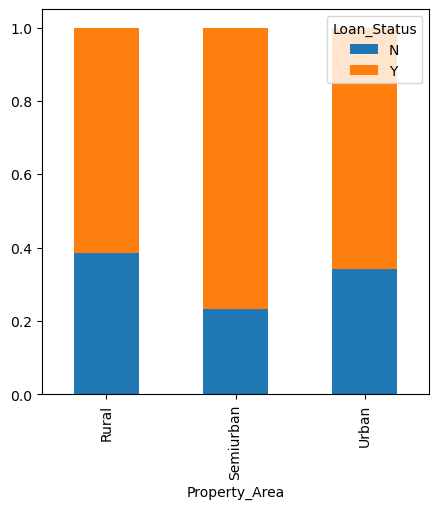

In [46]:
Property_Area = pd.crosstab(train_data['Property_Area'], train_data['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(5,5))
plt.show()

The proportion of loans getting approved in the semi-urban area is higher as compared to that in rural or urban areas.

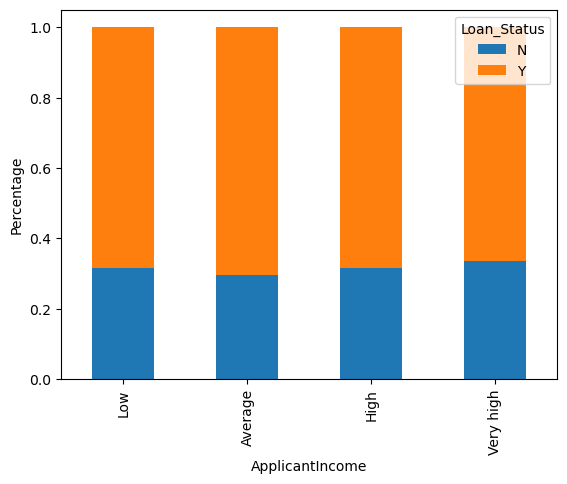

In [47]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High','Very high']
train_data['Income_bin'] = pd.cut(train_data['ApplicantIncome'],bins,labels=group)
Income_bin = pd.crosstab(train_data['Income_bin'], train_data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('ApplicantIncome')
P=plt.ylabel('Percentage')

It can be inferred that Applicant's income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant's income is high the chances of loan approval will also be high.

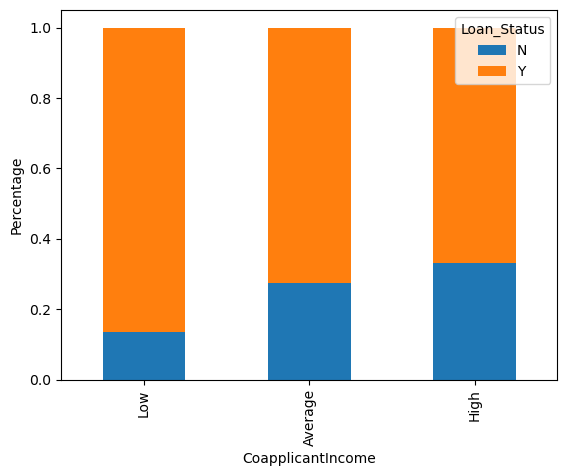

In [48]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train_data['Coapplicant_Income_bin'] = pd.cut(train_data['CoapplicantIncome'], bins, labels = group)
Coapplicant_Income_bin=pd.crosstab(train_data['Coapplicant_Income_bin'],train_data['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('CoapplicantIncome')
P=plt.ylabel('Percentage')

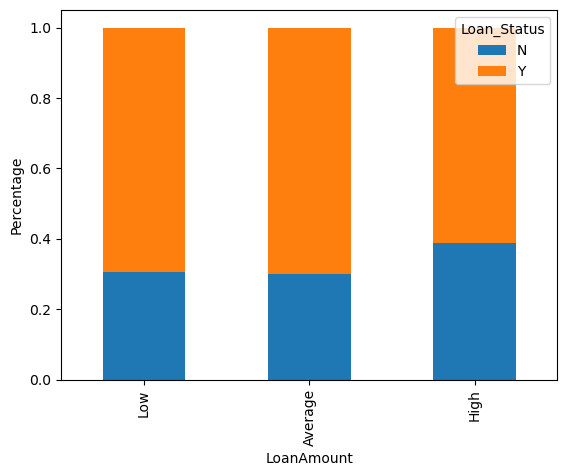

In [49]:
bins=[0,100,200,700]
group=['Low','Average','High']
train_data['LoanAmount_bin'] = pd.cut(train_data['LoanAmount'], bins, labels = group)
LoanAmount_bin = pd.crosstab(train_data['LoanAmount_bin'], train_data['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.xlabel('LoanAmount')
P=plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

In [50]:
train_data = train_data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin'], axis = 1)
train_data['Dependents'].replace('3+', 3, inplace = True)
test_data['Dependents'].replace('3+', 3, inplace = True)
train_data['Loan_Status'].replace('No', 0, inplace = True)
train_data['Loan_Status'].replace('Yes', 1, inplace = True)

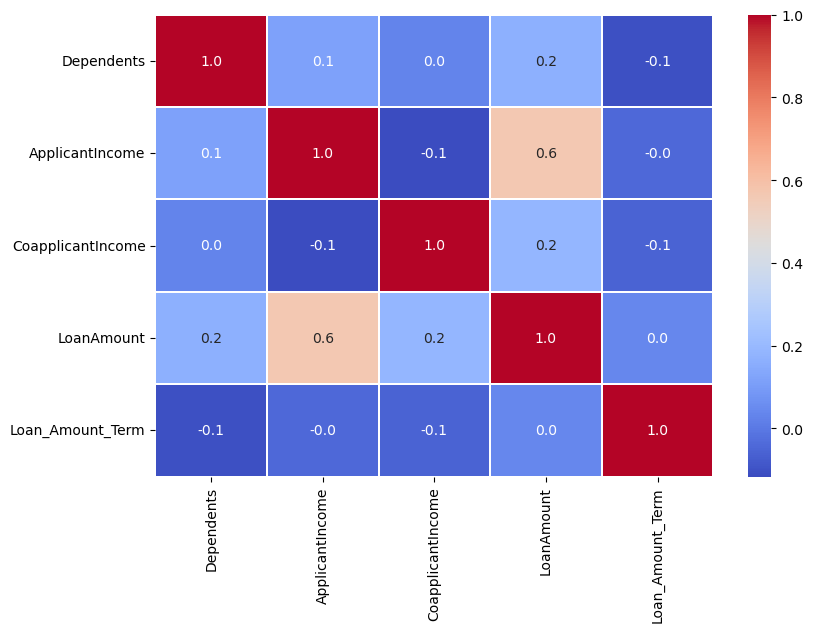

In [51]:
plt.figure(figsize=(9,6))
sns.heatmap(train_data.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

Now the distribution looks much closer to normal and the effect of extreme values has been significantly subsided

In [52]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146,360,Yes,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,Yes,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,Yes,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,Yes,Urban,Y


Convert Categorical column To Numerical

In [53]:
train_data.replace({'Gender': {'Male': 1, 'Female': 0},
                   'Married': {'No': 0, 'Yes': 1},
                   'Education': {'Graduate': 1, 'Not Graduate': 0},
                   'Self_Employed': {'No': 0, 'Yes': 1},
                    'Credit_History' : {'Yes' : 1, 'No' : 0},
                   'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2},
                   'Loan_Status': {'N': 0, 'Y': 1}}, inplace = True)

In [54]:
train_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146,360,1,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141,360,1,2,1


In [55]:
test_data.replace({'Gender': {'Male': 1, 'Female': 0},
                   'Married': {'No': 0, 'Yes': 1},
                   'Education': {'Graduate': 1, 'Not Graduate': 0},
                   'Credit_History' : {'Yes' : 1, 'No' : 0},
                   'Self_Employed': {'No': 0, 'Yes': 1},
                   'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2}}, inplace = True)

In [56]:
test_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [57]:
# Droping unwanted columns in Train and Test Dataset
train_data = train_data.drop('Loan_ID', axis = 1)
test_data = test_data.drop('Loan_ID', axis = 1)

# splitting Data into train_test_split

In [58]:
X = train_data.drop(columns=['Loan_Status'], axis=1)
Y = train_data['Loan_Status']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.20 , random_state = 42)

In [61]:
print(X.shape , X_train.shape , X_test.shape)

(614, 11) (491, 11) (123, 11)


# LOGISTIC REGRESSION

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics

In [63]:
model = LogisticRegression()
model.fit(X_train , Y_train)

LogisticRegression()

In [64]:
LogReg_prediction = model.predict(X_test)
print('Logistic Regression Accuracy = ' , metrics.accuracy_score(LogReg_prediction , Y_test))

Logistic Regression Accuracy =  0.7886178861788617


# RANDOM FOREST

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
classifier = RandomForestClassifier(n_estimators= 300,
                                    min_samples_split = 2,
                                    min_samples_leaf= 4,
                                    max_features= 'log2',
                                    max_depth= 5)

In [67]:
classifier.fit(X_train, Y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       n_estimators=300)

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix

In [70]:
Y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test , Y_pred)
cm

array([[18, 25],
       [ 1, 79]], dtype=int64)

<AxesSubplot:>

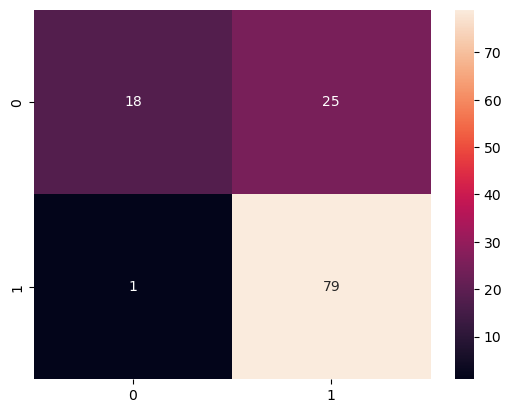

In [71]:
sns.heatmap(cm , annot = True)

In [72]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(Y_test, y_pred))

ACCURACY OF THE MODEL:  0.7886178861788617


In [73]:
print('classification_report:\n:' , classification_report(Y_test , Y_pred))

classification_report:
:               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# Hyper parameter Tuning

In [74]:
from sklearn.model_selection import RandomizedSearchCV

In [75]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=param_grid,
    n_iter=10,
    scoring='accuracy',
    cv=5,
    random_state=42
)

random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='accuracy')

In [76]:
    random_search.best_score_

0.8125541125541125

In [77]:
Finalmodel = classifier
Finalmodel.fit(X_train , Y_train)

RandomForestClassifier(max_depth=5, max_features='log2', min_samples_leaf=4,
                       n_estimators=300)

In [78]:
Prediction = Finalmodel.predict(test_data)

In [79]:
Prediction

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,